In [28]:
import numpy as np
import pandas as pd
from tesser import bic
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import glob, os

In [61]:
models = {}
files = [file for file in glob.glob("./Data/results/*.csv")] #grabs files from folder
for file in files:
    name = file[15:-4].lower()
    if 'free' in name:
        k = 7
    else:
        k =6
    n = 42
    results =pd.read_csv(file)
    bic_array = bic.get_bic(results, k , n, True)
    model_bic = bic.get_bic(results, k , n, False)
    d = bic.params(results, False)

    avgs = np.array([x for x in d.values()])
    param = [x for x in d.keys()]
    full = np.append(avgs,model_bic)
    models[name] = full

param.append('BIC')

In [62]:
models

{'community': array([ 5.99443210e-01,  5.96209123e-01,  1.22735321e+00, -2.44093962e+01,
         3.43768175e+03]),
 'gamma_free': array([ 3.22714546e-01,  4.64712097e-01,  1.01753756e+00, -2.52415251e+01,
         3.77115703e+03]),
 'gamma_zero': array([ 7.71072852e-01,  4.80252689e-01,  1.02980214e+00, -2.55006958e+01,
         3.51843792e+03]),
 'transition': array([ 7.76892351e-01,  5.74640044e-01,  7.29845789e-01, -2.51227683e+01,
         3.49047129e+03])}

In [63]:
df =pd.DataFrame(data = models.values(),  columns = param)
df['w_BIC'] = bic.wbic(df.BIC, axis=0)
df.index = models.keys()
df

,gamma,alpha,tau,log_like,BIC,w_BIC
community,0.599443,0.596209,1.227353,-24.409396,3437.681751,1.000000e+00
gamma_free,0.322715,0.464712,1.017538,-25.241525,3771.157027,3.861570e-73
gamma_zero,0.771073,0.480253,1.029802,-25.500696,3518.437924,2.910850e-18
transition,0.776892,0.574640,0.729846,-25.122768,3490.471289,3.442686e-12


In [64]:
df.columns

Index(['gamma', 'alpha', 'tau', 'log_like', 'BIC', 'w_BIC'], dtype='object')

[0, 0]
[0, 1]
[1, 0]
[1, 1]
[2, 0]
[2, 1]


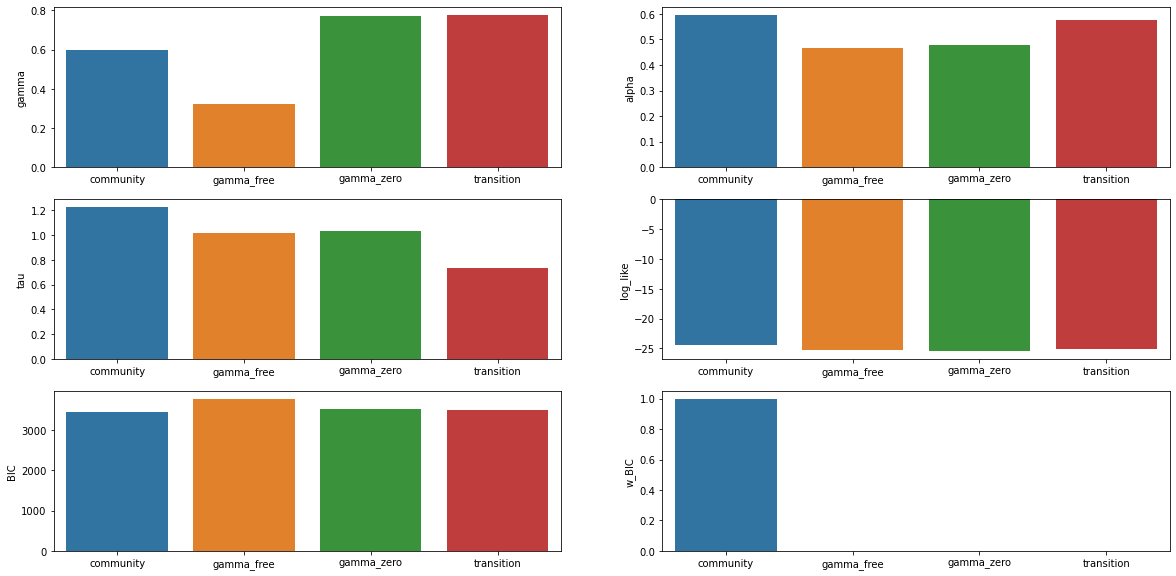

In [112]:
fig, axs = plt.subplots(3, 2, figsize =(20,10))
for i,n in enumerate(df.columns):
    print([i//2,i%2])
    ax =axs[i//2,i%2]
    sns.barplot(x=df.index, y=df[n], data=df, ci = 'sd', ax=ax)